In [318]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,initializers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model




In [319]:
train_path = './data/train'
val_path = './data/validation'
test_path = './data/test'


train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = (10),
                            brightness_range= (0.7, 0.9),
							zoom_range = 0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
							horizontal_flip = True,
                            )

train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (48, 48),
							batch_size = 128,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
							val_path,
							target_size = (48, 48),
							batch_size = 128,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
							test_path,
							target_size = (48, 48),
							batch_size = 128,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

Found 22319 images belonging to 5 classes.
Found 4780 images belonging to 5 classes.
Found 4794 images belonging to 5 classes.


In [320]:
initializer = initializers.GlorotNormal()

def build_model(input_shape=(48, 48, 1), num_classes=5):
    model = tf.keras.models.Sequential([
        # First convolution block
        tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer=initializer, input_shape=input_shape, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Second convolution block (similar to others)
        tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Third convolution block
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Fourth convolution block
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Fifth convolution block
        tf.keras.layers.Conv2D(256, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        # Flatten the output for dense layer
        tf.keras.layers.Flatten(),
        
        # Dense layer
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


# Set hyperparameters
epochs = 100
learning_rate = 0.001
loss = 'categorical_crossentropy'
batch_size = 64
momentum = 0.9
weight_decay = 0.000001

# Define optimizer
optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=momentum,  weight_decay = weight_decay)

early_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_acc', save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                             factor=0.1,
                             patience=6,
                             verbose=1,
                             min_delta=0.0001)

# Build the model
model = build_model()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

# Display model summary
model.summary()





/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_478 (Conv2D)             │ (None, 48, 48, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_249         │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_479 (Conv2D)             │ (None, 48, 48, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_248               │ (None, 24, 24, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_220 (Dropout)           │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_480 (Conv2D)             │ (None, 24, 24, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_250         │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_481 (Conv2D)             │ (None, 24, 24, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_249               │ (None, 12, 12, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_221 (Dropout)           │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_482 (Conv2D)             │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_251         │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_483 (Conv2D)             │ (None, 12, 12, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_250               │ (None, 6, 6, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_222 (Dropout)           │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_484 (Conv2D)             │ (None, 6, 6, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_252         │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_485 (Conv2D)             │ (None, 6, 6, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_251               │ (None, 3, 3, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_223 (Dropout)           │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_486 (Conv2D)             │ (None, 3, 3, 256)      │       524,54

 Total params: 2,610,501 (9.96 MB)

 Trainable params: 2,609,285 (9.95 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [269]:
history = model.fit(train_generator, validation_data = val_generator, epochs = epochs, batch_size = batch_size,  callbacks=[checkpoint, early_stopping, reduce_lr])
model.save('model_save_tunned.keras')


Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 142s 799ms/step - acc: 0.2364 - loss: 2.0809 - val_acc: 0.2885 - val_loss: 1.5858 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 142s 805ms/step - acc: 0.2904 - loss: 1.5835 - val_acc: 0.2885 - val_loss: 1.5867 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 139s 792ms/step - acc: 0.2868 - loss: 1.5737 - val_acc: 0.2885 - val_loss: 1.6105 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 137s 782ms/step - acc: 0.3052 - loss: 1.5444 - val_acc: 0.3335 - val_loss: 1.5134 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 139s 793ms/step - acc: 0.3585 - loss: 1.4438 - val_acc: 0.3874 - val_loss: 1.3601 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 141s 790ms/step - acc: 0.3958 - loss: 1.3647 - val_acc: 0.3667 - val_loss: 1.3821 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 136s 776ms/step - acc: 0.4091 - loss: 1.3251 - val_acc: 0.4506 - val_loss: 1.

175/175 ━━━━━━━━━━━━━━━━━━━━ 158s 898ms/step - acc: 0.6707 - loss: 0.8641 - val_acc: 0.6402 - val_loss: 0.9224 - learning_rate: 0.0010
Epoch 47/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 160s 910ms/step - acc: 0.6769 - loss: 0.8489 - val_acc: 0.6571 - val_loss: 0.9231 - learning_rate: 0.0010
Epoch 48/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 152s 868ms/step - acc: 0.6683 - loss: 0.8547 - val_acc: 0.6569 - val_loss: 0.9167 - learning_rate: 0.0010
Epoch 49/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 172s 981ms/step - acc: 0.6816 - loss: 0.8344 - val_acc: 0.6636 - val_loss: 0.8912 - learning_rate: 0.0010
Epoch 50/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 164s 932ms/step - acc: 0.6856 - loss: 0.8308 - val_acc: 0.6490 - val_loss: 0.9379 - learning_rate: 0.0010
Epoch 51/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 152s 866ms/step - acc: 0.6798 - loss: 0.8402 - val_acc: 0.6339 - val_loss: 0.9482 - learning_rate: 0.0010
Epoch 52/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 159s 907ms/step - acc: 0.6827 - loss: 0.8305 - val_acc: 0.6515 - val_loss: 0.9221 -

175/175 ━━━━━━━━━━━━━━━━━━━━ 175s 999ms/step - acc: 0.7257 - loss: 0.7180 - val_acc: 0.6805 - val_loss: 0.8820 - learning_rate: 1.0000e-05
Epoch 89/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 157s 891ms/step - acc: 0.7255 - loss: 0.7222 - val_acc: 0.6812 - val_loss: 0.8795 - learning_rate: 1.0000e-05
Epoch 90/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 168s 959ms/step - acc: 0.7213 - loss: 0.7161 - val_acc: 0.6822 - val_loss: 0.8804 - learning_rate: 1.0000e-05


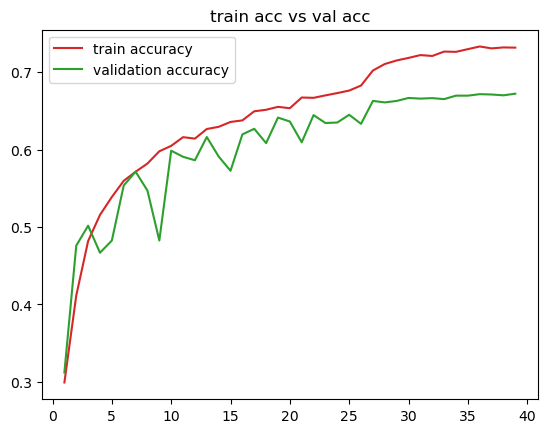

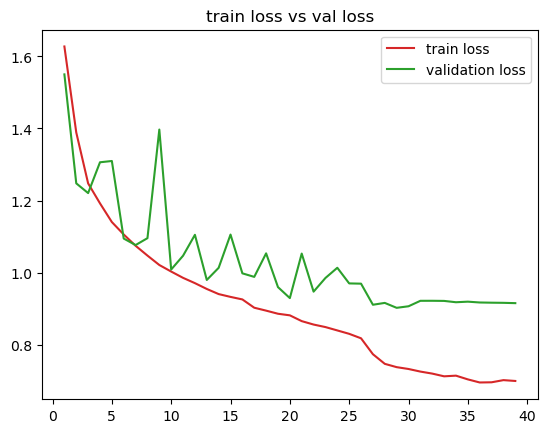

In [149]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'tab:red', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'tab:red', label='train loss')
plt.plot(epochs, val_loss, 'tab:green', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

# Reporte de resultados

## Modelo original

In [310]:
from keras.models import load_model
model = load_model('model_save.h5')
test_loss, test_acc = model.evaluate(test_generator, steps = 4800//128)

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - acc: 0.6548 - loss: 0.9226


In [311]:
from sklearn.metrics import confusion_matrix, classification_report

test_generator.reset()
predicted_labels = []
original_labels = []

for i in range(len(test_generator)):
    batch = test_generator[i]
    images, labels = batch
    predictions = model.predict(images)
    
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    
    predicted_labels.extend(batch_predicted_labels)
    
    original_labels.extend(labels)

predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)


cm = confusion_matrix(original_labels, predicted_labels)
print("Reporte de clasificación")
print(classification_report(original_labels, predicted_labels, target_names = list(test_generator.class_indices.keys()) ))

print("Mátriz de confusión")
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━

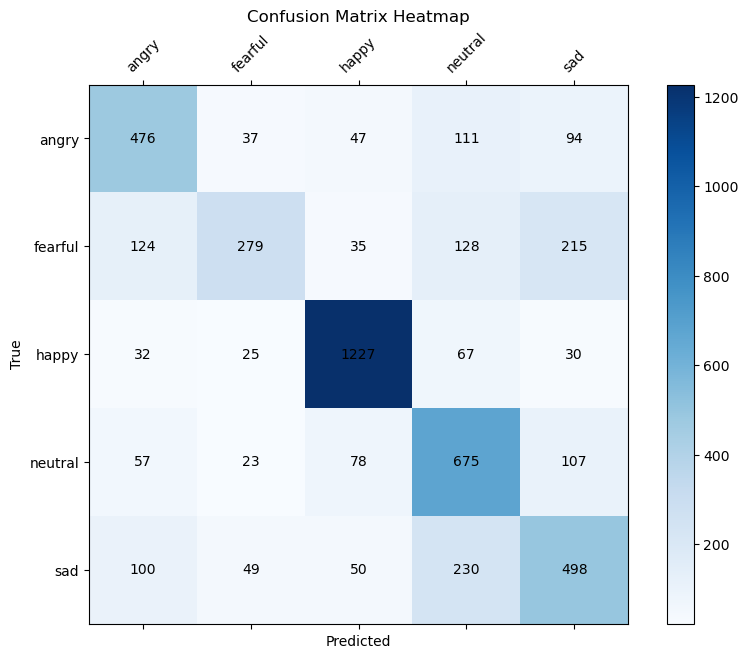

In [312]:
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(cm, cmap='Blues')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(test_generator.class_indices)))
ax.set_yticks(np.arange(len(test_generator.class_indices)))
ax.set_xticklabels(list(test_generator.class_indices.keys()), rotation=45)
ax.set_yticklabels(list(test_generator.class_indices.keys()))

plt.xlabel('Predicted')
plt.ylabel('True')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.title('Confusion Matrix Heatmap')
plt.show()

## Modelo con mejores resultados

In [315]:
model = load_model('best_model.keras')
test_loss, test_acc = model.evaluate(test_generator, steps = 4800//128)

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - acc: 0.6822 - loss: 0.8477


In [316]:
test_generator.reset()
predicted_labels = []
original_labels = []

for i in range(len(test_generator)):
    batch = test_generator[i]
    images, labels = batch
    predictions = model.predict(images)
    
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    
    predicted_labels.extend(batch_predicted_labels)
    
    original_labels.extend(labels)

predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)


cm = confusion_matrix(original_labels, predicted_labels)
print("Reporte de clasificación")
print(classification_report(original_labels, predicted_labels, target_names = list(test_generator.class_indices.keys()) ))

print("Mátriz de confusión")
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━

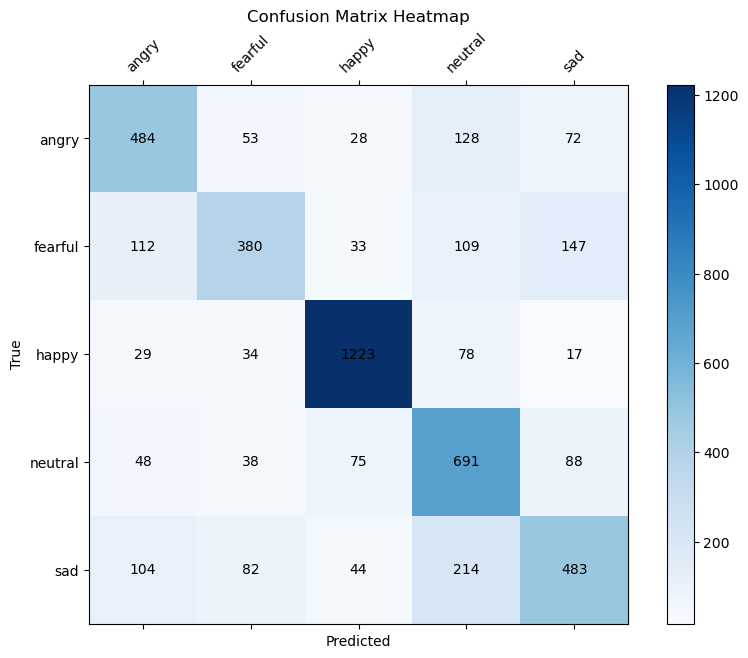

In [317]:
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(cm, cmap='Blues')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(test_generator.class_indices)))
ax.set_yticks(np.arange(len(test_generator.class_indices)))
ax.set_xticklabels(list(test_generator.class_indices.keys()), rotation=45)
ax.set_yticklabels(list(test_generator.class_indices.keys()))

plt.xlabel('Predicted')
plt.ylabel('True')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.title('Confusion Matrix Heatmap')
plt.show()